In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

## Regressão Linear Simples

In [2]:
# Importando base de dados
base = pd.read_csv('../Dados/Cars.csv')
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [3]:
# Removendo coluna Unnamed: 0
base = base.drop(['Unnamed: 0'], axis = 1)

# Dividindo base entre treino e teste
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values

In [4]:
# Calculando a correlação
correlacao = np.corrcoef(X, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [5]:
# Transformando de array para matriz
X = X.reshape(-1, 1)

# Criando modelo de treinamento e teste
modelo = LinearRegression()
modelo.fit(X, y)

# Verificando valores de interceptação, inclinação e residuais
print(modelo.intercept_)
print(modelo.coef_)
print(modelo._residues)

8.283905641787175
[0.16556757]
478.02124836119634


In [6]:
# Verficando R2
modelo.score(X, y)

0.6510793807582509

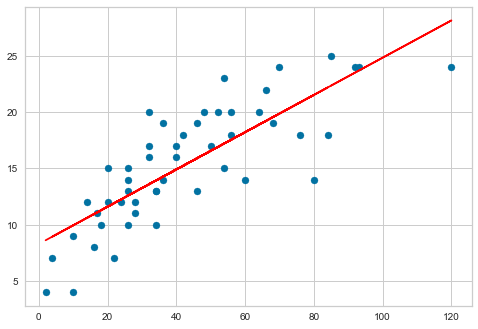

In [7]:
# Valores preditos
previsoes = modelo.predict(X)

# Plotando grafico de dispersão do modelo
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

In [10]:
# Testando modelo
print(modelo.intercept_ + modelo.coef_ * 22)
print(modelo.predict([[22]]))

[11.92639228]
[11.92639228]


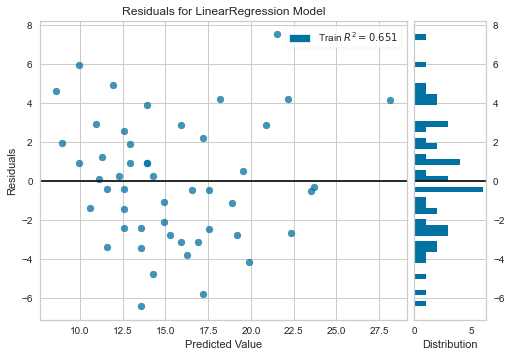

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [11]:
# Usando a biblioteca yellowbrick, valores residuais
vizualizador = ResidualsPlot(modelo)
vizualizador.fit(X, y)
vizualizador.poof()

## Regressão Linear Simples

In [12]:
# Importando base de dados
base = pd.read_csv('../Dados/MtCars.csv')
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
# Removendo coluna Unnamed: 0
base = base.drop(['Unnamed: 0'], axis = 1)

# Dividindo base entre treino e teste
X = base.iloc[:, 2].values
y = base.iloc[:, 0].values

In [14]:
# Calculando a correlação
correlacao = np.corrcoef(X, y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [15]:
# Transformando de array para matriz
X = X.reshape(-1, 1)

# Criando modelo de treinamento e teste
modelo = LinearRegression()
modelo.fit(X, y)

# Verificando valores de interceptação, inclinação e residuais
print(modelo.intercept_)
print(modelo.coef_)
print(modelo._residues)

29.599854756163946
[-0.04121512]
317.15868928218464


In [16]:
# Verficando R2
modelo.score(X, y)

0.7183433404897299

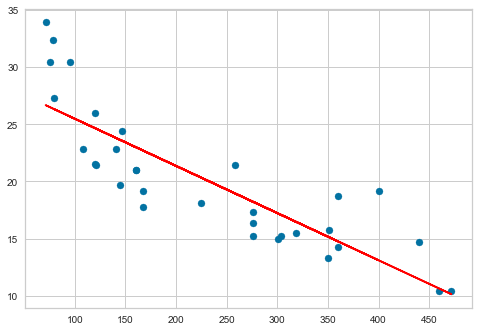

In [17]:
# Valores preditos
previsoes = modelo.predict(X)

# Plotando grafico de dispersão do modelo
plt.scatter(X, y)
plt.plot(X, previsoes, color = 'red')

In [18]:
# Testando modelo
print(modelo.intercept_ + modelo.coef_ * 200)
print(modelo.predict([[200]]))

[21.35683076]
[21.35683076]


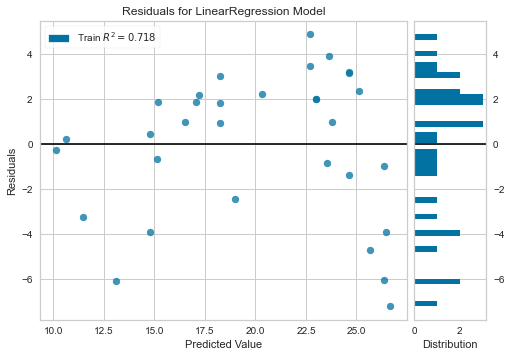

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
# Usando a biblioteca yellowbrick, valores residuais
vizualizador = ResidualsPlot(modelo)
vizualizador.fit(X, y)
vizualizador.poof()

In [20]:
# Regressão linear simple usando biblioteca statsmodels
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data = base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.38e-10
Time:                        11:31:55   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""